In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt


In [5]:
# PARAMETERS
IDX_MIN = 3
IDX_MAX = 27

OUTPUT_PATH = 'output/01_purple/'

REA = 1
REP = 1

XMIN = 199
XMAX = 201
YMIN = 0
YMAX = 100

COLOR_A = 'C0'
COLOR_B = 'C9'
COLOR_C = 'C3'

T_STEP = 5000
SAVE_INTERVAL = 8


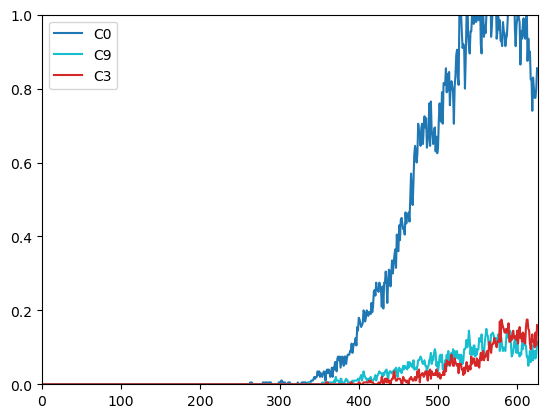

In [35]:
for idx in range(IDX_MIN, IDX_MIN+REA):
    c = np.zeros((int(T_STEP/SAVE_INTERVAL)+1, 3))
    for n in range(REP):
        # Reading particle simulation data
        pos_x_list, pos_y_list, label_list = np.load(f'{OUTPUT_PATH}index_{idx+n*REA}.npz').values()
        
        pos_x_mask = (pos_x_list > XMIN) & (pos_x_list < XMAX) 
        pos_y_mask = (pos_y_list > YMIN) & (pos_y_list < YMAX)
        mask = pos_x_mask & pos_y_mask
        
        c[:,0] = ma.count_masked(ma.masked_array(label_list, mask=mask&(label_list==COLOR_A)), axis=1)
        c[:,1] = ma.count_masked(ma.masked_array(label_list, mask=mask&(label_list==COLOR_B)), axis=1)
        c[:,2] = ma.count_masked(ma.masked_array(label_list, mask=mask&(label_list==COLOR_C)), axis=1)
        
    c = 1/((XMAX-XMIN)*(YMAX-YMIN))* c * (1/REP)

    plt.plot(c[:, 0], label=COLOR_A, color=COLOR_A)
    plt.plot(c[:, 1], label=COLOR_B, color=COLOR_B)
    plt.plot(c[:, 2], label=COLOR_C, color=COLOR_C)
    plt.xlim(0, int(T_STEP/SAVE_INTERVAL)+1)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()